Jazda na mechanickom býkovi.
Máme historické dáta o 1000 súťažiacich, každého sme pozorovali 100 krát. (Dáta dodáme v csv súbore.)

Uvažujme nasledovný model:
Pretekár $k$ je charakterizovaný jedným číslom $m_k$ a logaritmus jeho času v konkrétnom závode je vybraný z normálneho rozdelenia so strednou hodnotou $m_k$ a varianciou $\tau^2$.

Ďalej predpokladajme, že rozdelenie čísla $m$ v prírode je normálne so strednou hodnotou $\mu$ a varianciou $\sigma^2$.

* a) Z dát odhadnite hodnoty parametrov $\tau, \mu, \sigma$. (Hint: Mali by vyjsť približne malé celé čísla.)

* b) Predpokladajme že sme namerali $\mu = \sigma = \tau = 1$. Objavíme nového jazdca, ktorého sme videli súťažiť len dva krát s časmi $e^2$ sekúnd a $e^3$ sekúnd. Aká je pravdepodobnosť, že v ďalšej súťaži vydrží aspoň $e^2$ sekúnd?
(Hint: s ohľadom na veľké množstvo dát predpokladajte, že parametre $\tau, \mu, \sigma$ sú presne určené.)


## Solution:
We measured $\mu = \sigma = \tau = 1$.
Denote $x_0 = 2$, $x_1 = 3$ the logarithms of the observed times.

Posterior distribution of parameter $m$ of the new contestant is
$$ m \sim Norm\big( \frac{\mu + x_0 + x_1}{3}, var= \frac 1 3 \big) = Norm\big( mean=2, var= \frac 1 3 \big)$$

Thus the distribution of the logarithm of his next time is distributed as 
$$x_2 \sim Norm\big( mean=2, var= \frac 1 3 + 1 \big)$$
Consequently probability that $x_2 > 2$ is $\frac 1 2$.


## Generate Data

In [54]:
import numpy as np
from numpy import random as rnd

In [ ]:
mu = sigma = tau = 1

In [6]:
M = rnd.normal(loc=mu, scale=sigma, size=1000)

In [39]:
ln_T = np.array([rnd.normal(loc=m, scale=tau, size=100) for m in M])
T = np.exp(ln_T)

**Check it**

In [40]:
M.mean(), M.std()

(0.9999062795988837, 1.0079594638200955)

In [41]:
ln_T.mean(), ln_T.std()

(0.9983877409654313, 1.4162135677817986)

In [42]:
(ln_T - M[:, None]).mean(), (ln_T - M[:, None]).std()

(-0.001518538633452256, 0.9982389022878385)

**Save to file**

In [43]:
import pandas as pd

In [44]:
df = pd.DataFrame(T)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,20.333740,5.318111,6.222259,1.151210,6.416893,6.056503,5.899793,5.422069,3.969427,18.739121,...,7.033563,25.001109,8.566212,8.244436,2.184360,5.498176,2.110978,4.645810,2.411930,4.505944
1,2.016218,29.702839,7.743340,23.692174,24.375903,2.570488,3.978635,13.553372,22.005798,4.061112,...,16.199944,7.496730,63.186551,6.978679,3.096965,1.135852,3.151352,10.010178,6.688825,15.055173
2,0.098910,0.647817,1.638456,0.421921,2.743406,12.344246,1.115575,2.432689,0.999417,1.256698,...,2.185681,0.196562,2.435643,1.102194,1.521679,1.170022,2.370964,0.409610,1.309465,0.160516
3,5.432088,0.751066,3.897483,3.824519,8.284731,13.804523,5.911102,15.446412,6.194808,1.483478,...,2.217308,6.212220,10.340716,1.788997,1.110360,5.744799,10.447801,0.529797,4.648076,9.370161
4,1.234847,10.912452,4.696745,3.601206,9.120497,6.184297,6.994796,1.340925,1.408235,1.259033,...,6.194439,4.539114,3.876248,4.212600,1.246499,1.527642,5.484048,0.175399,2.980338,8.389928


In [45]:
df.to_csv("d:/bull_riding_times.csv", header=False, index=False )

# Estimate parameters from data

In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [27]:
path = r"D:\testovaci_data – kopie.csv"
data = pd.read_csv(path, header=None)

In [28]:
data = np.log(data.values)

In [29]:
means = data.mean(axis=1)

In [35]:
variances = np.var(data, axis=1, ddof=1)

(array([ 3.,  8., 10.,  9., 15., 16., 15., 12.,  9.,  3.]),
 array([-2.17650288, -1.76393493, -1.35136698, -0.93879903, -0.52623109,
        -0.11366314,  0.29890481,  0.71147276,  1.12404071,  1.53660866,
         1.94917661]),
 <a list of 10 Patch objects>)

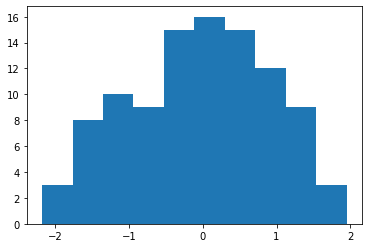

In [36]:
plt.hist(data[0])

In [37]:
variances

array([0.90380014, 1.02071644, 0.96944427, 0.82932465, 0.86964839,
       1.14616163, 0.87715381, 0.81523502, 0.88160126, 1.05025949,
       0.88732464, 1.03189345, 1.05407868, 0.99745269, 0.80341208,
       1.01535552, 0.81401019, 1.18363527, 1.255344  , 1.10239795,
       0.98057425, 0.7840284 , 1.23487003, 1.09116752, 0.94390191,
       0.96164899, 0.87908261, 0.90325137, 0.96636375, 1.02263574,
       1.14343631, 1.07107295, 0.77604548, 1.07744931, 1.09070897,
       0.96052958, 0.81671   , 0.94765955, 0.92390701, 0.9207985 ,
       1.1489125 , 1.14819525, 0.8906967 , 0.76966752, 0.88902859,
       0.95877602, 1.0205723 , 1.16684053, 1.08680058, 0.90898336,
       0.86814101, 0.93003518, 0.82236283, 0.89230141, 0.93932381,
       0.86058288, 0.97975015, 1.08221855, 1.1847425 , 1.08661402,
       0.98426519, 1.07534889, 1.04042156, 1.03635815, 1.12597324,
       1.05887055, 1.00724102, 1.24650256, 0.81157374, 0.83467384,
       1.29284325, 1.00958546, 1.01460106, 0.81187493, 0.89337

In [38]:
tau2 = variances.mean()
tau = tau2 ** (1/2)
tau

0.9993817093574141

In [41]:
mu = data.mean()
mu

3.2285123728225584

In [43]:
sigma2 = np.var(means, ddof=1) - tau2 / data.shape[1]

In [44]:
sigma = np.sqrt(sigma2)

In [45]:
sigma

2.707150495411907

In [51]:
print(f"mu = {mu}, sigma = {sigma}, tau = {tau}")

mu = 3.2285123728225584, sigma = 2.707150495411907, tau = 0.9993817093574141


# Bordel

In [61]:
mu = np.pi
sigma = np.e 
tau = 1

In [82]:
M = rnd.normal(loc=mu, scale=sigma, size=1000)

np.mean(M)

3.1261191491258637

In [83]:
sigma / (1000)**(1/2)

0.08595961900177693

In [86]:
ln_T = np.array([rnd.normal(loc=m, scale=tau, size=100) for m in M])
T = np.exp(ln_T)

In [88]:
np.mean(ln_T)

3.1289709304530664

In [87]:
data = ln_T